In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [7]:


# Define signal parameters

signal_length = 1000  # samples
sample_rate = signal_length*3  # Hz
num_frequencies = 2  # Number of dominant frequencies

# Generate random frequencies
frequencies = np.random.rand(num_frequencies) * sample_rate / 2  # Normalize to Nyquist

# Generate random amplitudes
amplitudes = np.random.rand(num_frequencies)

# Create time vector
t = np.linspace(0, signal_length / sample_rate, signal_length)

# Generate random signal with multiple frequencies
rand_signal = np.zeros(signal_length)
for i in range(num_frequencies):
    rand_signal += amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t)

# Add white noise (optional)
noise_power = 0.01  # Adjust for desired noise level
noise = np.random.normal(scale=np.sqrt(noise_power), size=signal_length)
rand_signal += noise

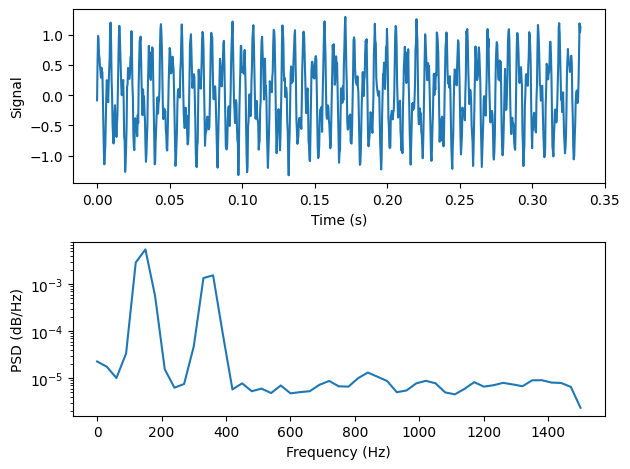

In [8]:
# Calculate PSD using Welch's method

freqs, psd = signal.welch(rand_signal, fs=sample_rate, nperseg=100)

# Plot time domain signal
plt.subplot(2, 1, 1)
plt.plot(t, rand_signal)
plt.xlabel('Time (s)')
plt.ylabel('Signal')

# Plot PSD
plt.subplot(2, 1, 2)
plt.plot(freqs, psd)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB/Hz)')
plt.yscale('log')  # Logarithmic scale for better visualization

plt.tight_layout()
plt.show()
